## Linear regression cant be used when
1. there are more than two categorical values.
2. it will not show the exact probability distribution when there are categorical values. So we cant depend on the predicted value.
3. if there is true genuine outliers then the model will be inefficient

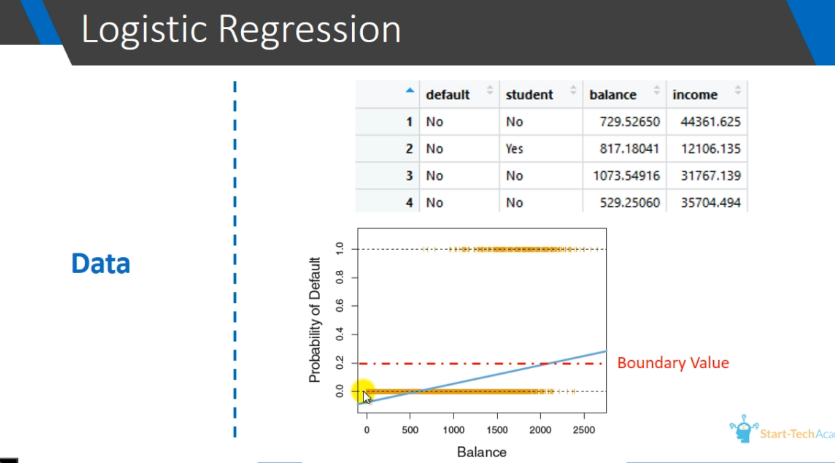

Taking the dummy and regressing on default we get this line.Here the probability of default less than 0. It cant be interpreted as it makes no sense. So we need a new model which ranges between 0 and 1

## Logistic regression

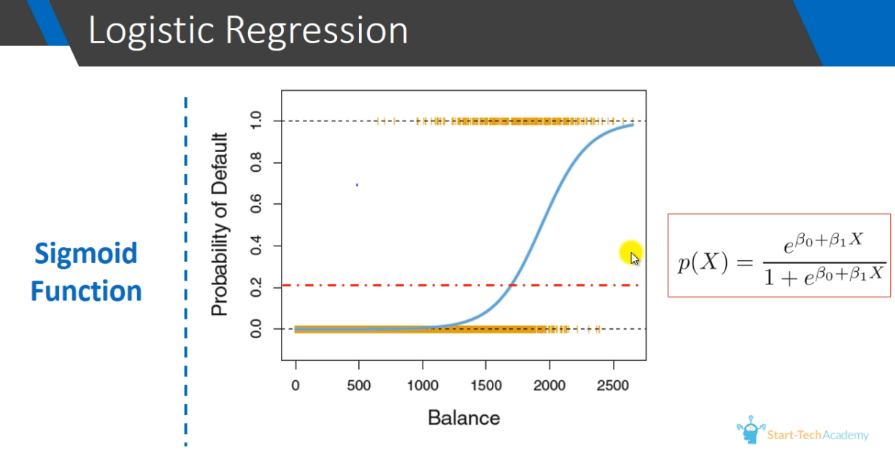

The logistic regression is 'S' shaped.It addresses the above mentioned issue. 
1. It ranges between 0 and 1
2. It also take care of the outliers as the curve bends at both ends and reached to the outliers.

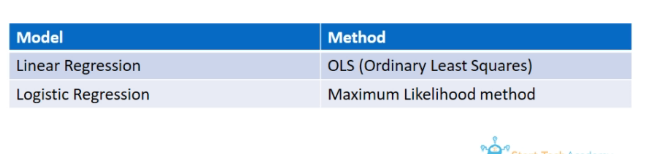

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv("F:\\Codes\\Dataset\\Data Files\\2. ST Academy - Classification models resource files\\House_Price.csv", header=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                506 non-null    int64  
 1   price                     506 non-null    float64
 2   crime_rate                506 non-null    float64
 3   resid_area                506 non-null    float64
 4   air_qual                  506 non-null    float64
 5   room_num                  506 non-null    float64
 6   age                       506 non-null    float64
 7   teachers                  506 non-null    float64
 8   poor_prop                 506 non-null    float64
 9   n_hos_beds                506 non-null    float64
 10  n_hot_rooms               506 non-null    float64
 11  rainfall                  506 non-null    int64  
 12  parks                     506 non-null    float64
 13  avg_dist                  506 non-null    float64
 14  airport_YE

## Logistic with single predictor

In [6]:
X = df[['price']]

In [7]:
y = df['Sold']

In [8]:
X.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [9]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Sold, dtype: int64

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
clf_lrs = LogisticRegression()

In [12]:
clf_lrs.fit(X,y)

LogisticRegression()

In [13]:
clf_lrs.coef_

array([[-0.03571865]])

In [14]:
clf_lrs.intercept_

array([0.61477516])

## Logistic with multiple predictors

In [15]:
X1 = df.loc[:,"price" :"waterbody_River"]
X1.shape

(506, 17)

In [16]:
y1 = df['Sold']

In [17]:
clf_lr = LogisticRegression(max_iter=3000)

In [18]:
clf_lr.fit(X1,y1)

LogisticRegression(max_iter=3000)

In [19]:
clf_lr.coef_

array([[-0.26538407, -0.27340846,  0.00611812, -0.87196102,  1.10921381,
        -0.00557201,  0.25937147, -0.19687485,  0.17985736, -0.07047937,
        -0.0048191 , -0.01744469, -0.34361305, -0.15649494, -0.06662109,
        -0.04110126,  0.21110024]])

In [20]:
clf_lr.intercept_

array([-2.57495665])

## Predicting 

Predict_prob() gives the probability of each values to the particular class

In [21]:
clf_lr.predict_proba(X1)

array([[0.13311547, 0.86688453],
       [0.34784457, 0.65215543],
       [0.9606988 , 0.0393012 ],
       ...,
       [0.2492727 , 0.7507273 ],
       [0.23885381, 0.76114619],
       [0.16242765, 0.83757235]])

First column is prob of zero that is not sold and last column is sold (prob =1).

In [22]:
y1_pred = clf_lr.predict(X1)

In [23]:
y1_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,

As we didnt mention any prob , it will take prob less than 0.5 as cannot be sold and viceversa for prob > 0.5

## Setting a specific prob

In [24]:
y1_pred_03 = (clf_lr.predict_proba(X1)[:,1] >=0.3)

In [25]:
y1_pred_03

array([ True,  True, False, False, False, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,

## Confusion matrix

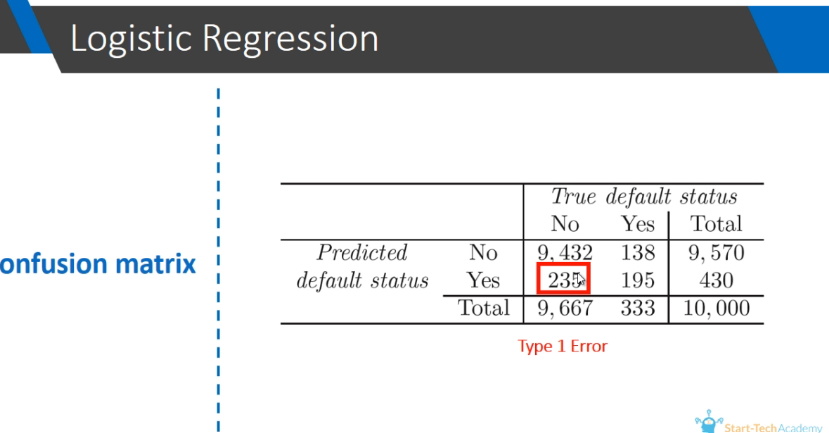

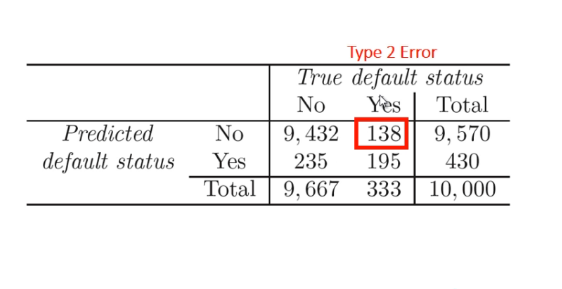

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y1,y1_pred)

array([[200,  76],
       [ 75, 155]], dtype=int64)

1. rows represents actual outcome.
2. 1st row shows prob = 0,2nd row shows prob =1 
3. Column shows the predicted classes
4. (1,1) i.e 200 shows the true and predicted values are 0
5. (1,2)i.e 76 shows the actual value is 0 and the predicted value is 1.(false postive)
6. (2,1) shows the false negative



In [28]:
confusion_matrix(y1, y1_pred_03)

array([[126, 150],
       [ 18, 212]], dtype=int64)

It is clear now false positive have increased, while false negative have decreased

## Performance measuers

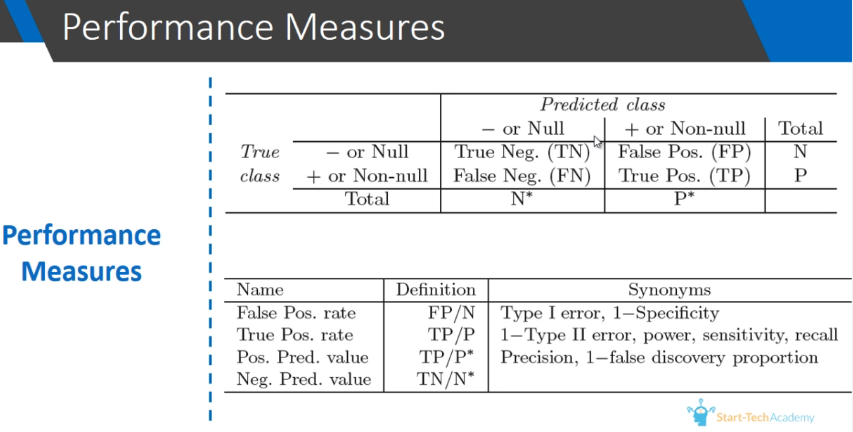

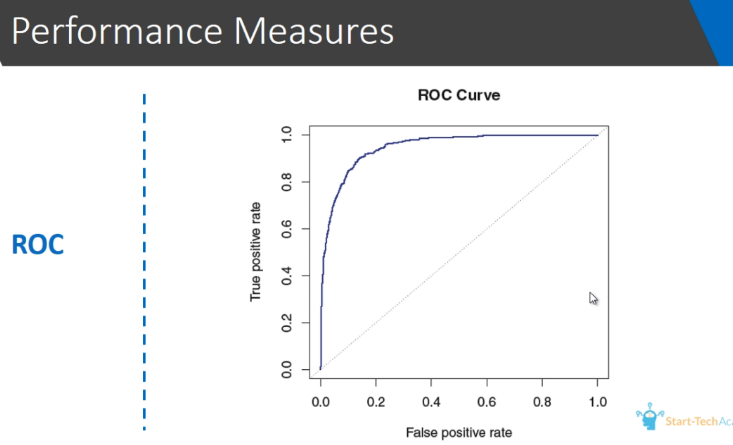

The closer is the curve to y axis, it is considered as gud predictor.

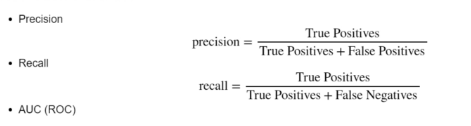

In [29]:
from sklearn.metrics import precision_score, recall_score

In [30]:
precision_score(y1, y1_pred)

0.670995670995671

In [31]:
recall_score(y1, y1_pred)

0.6739130434782609

In [32]:
from sklearn.metrics import roc_auc_score

In [33]:
roc_auc_score(y1, y1_pred)

0.6992753623188406

## train test split

In [1]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 17) (102, 17) (404,) (102,)


In [37]:
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [38]:
y_test_pred = clf_lr.predict(X_test)

In [39]:
confusion_matrix (y_test, y_test_pred)

array([[39, 19],
       [13, 31]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_test_pred)

0.6862745098039216